#Paquetes necesarios

In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import math

Carga imagen y convierte a RGB

(938, 473, 3)


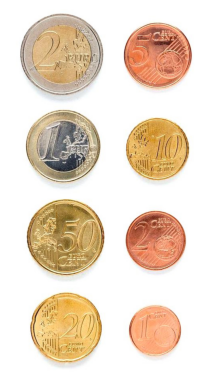

In [6]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a gris y muestra histograma

(0.0, 256.0)

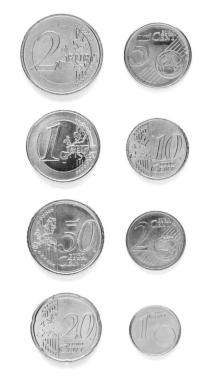

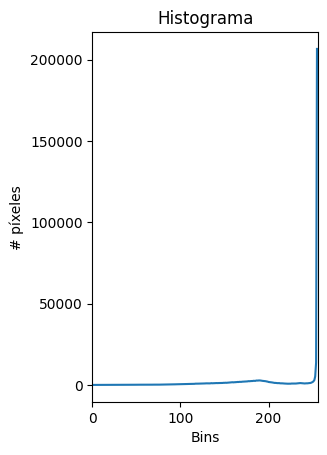

In [3]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Cuenta elementos tras umbralizar

Text(0.5, 1.0, 'OTSU invertida')

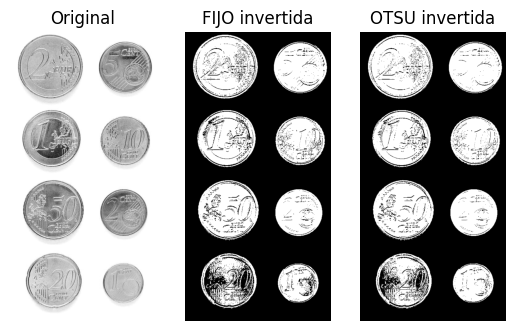

In [4]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 200
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')



Búsqueda de componentes y sus contornos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


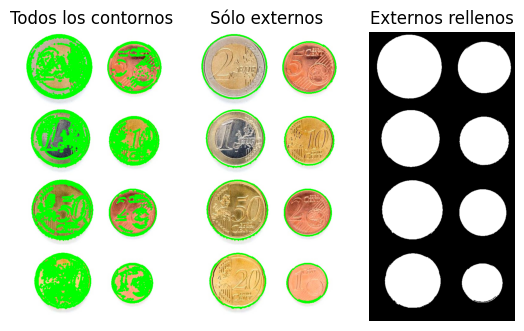

In [5]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


In [8]:
def applyThreshold(img_rgb, umbral, option):

    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()

    #Convierte a gris
    self_img_gris = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    #Cálculo del histograma de una imagen en escala de grises
    hist = cv2.calcHist([self_img_gris], [0], None, [256], [0, 256])

    # Histograma sin normalizar
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Histograma")
    plt.xlabel("Bins")
    plt.ylabel("# píxeles")
    plt.plot(hist)
    plt.xlim([0, 256])

    if option == 1:
        #Umbralización binaria invertida, objetos en blanco
        res,img_th = cv2.threshold(self_img_gris,umbral,255,cv2.THRESH_BINARY_INV)
      
    else:
        #Otsu
        res,img_th = cv2.threshold(self_img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    plt.figure()
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(self_img_gris,cmap='gray') 
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(img_th1,cmap='gray') 
    plt.title('FIJO invertida')

    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(img_th2,cmap='gray') 
    plt.title('OTSU invertida')

    return img_th

In [9]:
def findCircles(img_otsu, self_img_rgb):

    self_img_rgb_copy_1 = self_img_rgb.copy()
    self_img_rgb_copy_2 = self_img_rgb.copy()

    #Sólo contornos externos
    contornos2, hierarchy2 = cv2.findContours(img_otsu, 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)

    # Dibuja sobre la imagen de entrada sólo contornos externos
    cv2.drawContours(self_img_rgb_copy_1, contornos2, -1, (0,255,0), 3)
    plt.subplot(132)
    plt.axis("off")
    plt.imshow(self_img_rgb_copy_1) 
    plt.title('Sólo externos')

    coin_count = 0
    for c in contornos2:
        #Área
        area = cv2.contourArea(c)

        if area > 10:
            #Perímetro
            perimetro = cv2.arcLength(c,True)
            if area > 0 and perimetro > 0:
                thinness_ratio = (4*math.pi*area)/(perimetro*perimetro)
                if 0.6 <= thinness_ratio <= 1:
                    #Dibuja los contornos
                    cv2.drawContours(self_img_rgb_copy_2, [c], -1, (0,255,0), 3)
                    coin_count += 1


    plt.subplot(133)
    plt.axis("off")
    plt.imshow(self_img_rgb_copy_2) 
    plt.title('Total de monedas: ' + str(coin_count))
    plt.show()

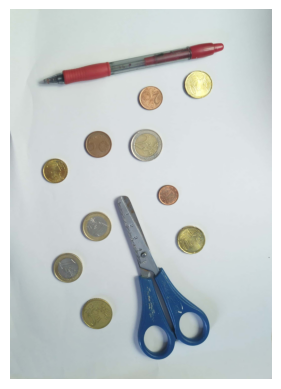

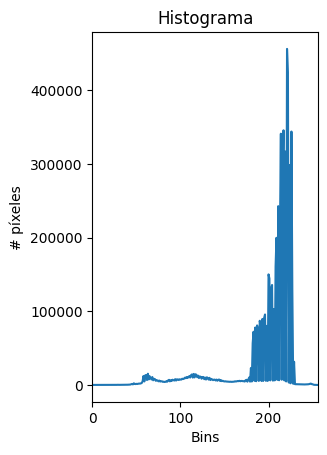

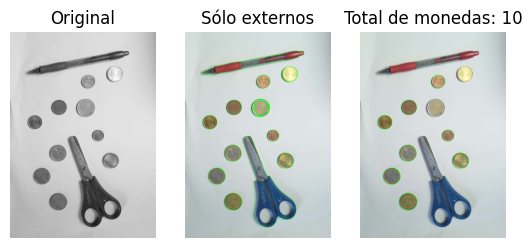

In [10]:
self_img = cv2.imread('prueba1.jpg')

#OpenCV lee las imágenes en BGR, por lo que convertimos para visualizar RGB
self_img_rgb = cv2.cvtColor(self_img, cv2.COLOR_BGR2RGB)
self_img_rgb_copy = self_img_rgb.copy() 

img_thd = applyThreshold(self_img_rgb, 400, 2)
findCircles(img_thd, self_img_rgb_copy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


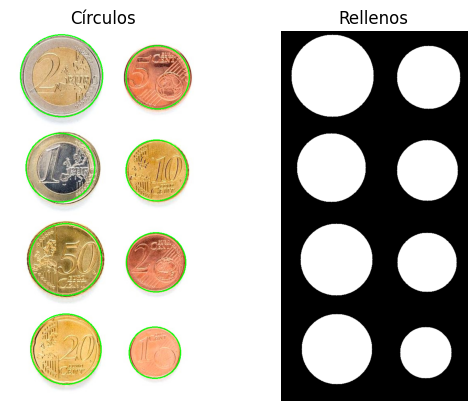

In [11]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




In [12]:
def get_draw_contours(image):

    gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Suaviza altas frecuencias
    pimg = cv2.medianBlur(gris, 7)

    #Localiza Círculos
    circ = cv2.HoughCircles(
            pimg,  # imagen 
            cv2.HOUGH_GRADIENT,  # tipo de detección
            1,
            100,  # distancia mínima entre círculos
            param1=100, # Valor del gradiente
            param2=35, #Umbral acumulador
            minRadius=10,  # radio mínimo
            maxRadius=100,  # radio máximo
        )


    #Dibuja sobre entrada  e imagen vacía
    img_cont = np.zeros(image.shape)
    for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(image,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 3)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Muestra resultado
    plt.subplot(121)
    plt.axis("off")
    plt.imshow(image_rgb) 
    plt.title('Círculos')

    plt.subplot(122)
    plt.axis("off")
    plt.imshow(img_cont) 
    plt.title('Rellenos')

    plt.show()

    return image, circ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


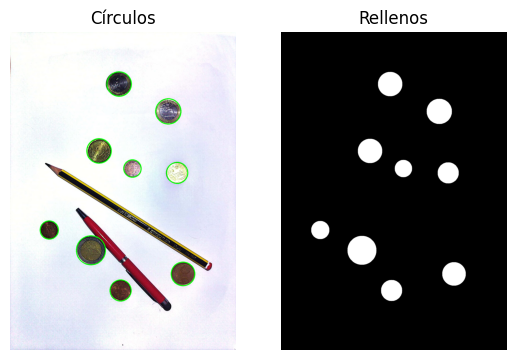

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


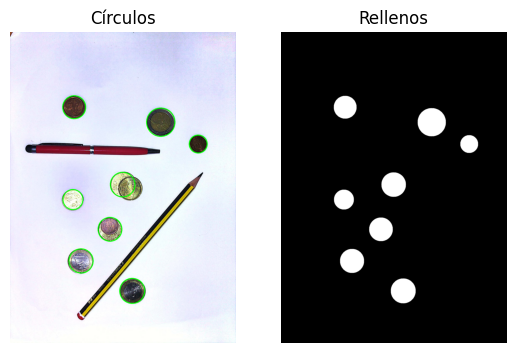

In [13]:

# Reading image
img_no_sol = cv2.imread('imagen_no_solapada.jpg')
img_sol = cv2.imread('imagen_solapada.jpg')

# Get and draw coin contours
img_no_sol, img_circles_no_sol = get_draw_contours(img_no_sol.copy())
img_sol, img_circles_sol = get_draw_contours(img_sol.copy())

img_no_sol_copy = img_no_sol.copy()
img_sol_copy = img_sol.copy()

In [14]:
def checkCircles(x, y, circles, img):

    for circle in circles[0]:
        circle_x, circle_y, circle_radio = circle
        if ((x - circle_x)**2) + ((y - circle_y)**2) <= circle_radio**2:
            cv2.circle(img, (int(circle_x), int(circle_y)), int(circle_radio),(0, 0, 255), 3)
            return (img, 1, circle)
    
    return (img, 0, None)

In [15]:
def getMoney(circles, euro):
    # Inicializa variables
    index_of_coin = 0  # Índice de la moneda más cercana
    money_amount = 0  # Valor total del dinero
    coin_detection = []  # Lista de valores de monedas detectadas
    euro_size = euro[2]  # Tamaño del círculo de referencia "euro"

    # Define un diccionario que asocia proporciones de radio con valores de monedas
    coins = {0.6993548387: 0.01,0.8064516129: 0.02,0.9139784946: 0.05,0.8494623655: 0.10,0.9569892473: 0.20,1.0430107526: 0.50,1: 1.0,1.1075268817: 2.0
    }

    # Itera a través de los círculos detectados
    for circle in circles[0]:
        x, y, radio = circle  # Extrae las coordenadas del centro y el radio del círculo

        # Calcula la proporción del radio del círculo detectado con respecto al círculo de referencia "euro"
        proportion_to_euro = radio / euro_size

        dif = 100  # Establece un umbral alto para comparar las diferencias

        # Itera a través de las proporciones de radio y sus valores correspondientes en el diccionario "coins"
        for prop, value in coins.items():
            close_to_euro = abs(proportion_to_euro - prop)  # Calcula la diferencia absoluta

            # Si la diferencia calculada es menor que el umbral actual
            if close_to_euro < dif:
                dif = close_to_euro  # Actualiza el umbral
                index_of_coin = prop  # Actualiza el índice de la moneda más cercana

        money_amount += coins[index_of_coin]  # Agrega el valor de la moneda al valor total
        coin_detection.append(coins[index_of_coin])  # Agrega el valor de la moneda a la lista

    # Devuelve el valor total del dinero y la lista de valores de las monedas detectadas
    return money_amount, coin_detection


In [16]:
def printMoneyValues(res, status, img_circles, euro):
    # Configura la fuente y la variable para llevar un registro del valor total temporal
    font = cv2.FONT_HERSHEY_SIMPLEX
    total_money_aux = 0

    # Si el estado es igual a 1 (es decir, se han detectado monedas)
    if status == 1:
        # Calcula el valor total de las monedas detectadas y obtiene la lista de valores de monedas
        total_money_aux, coin_detection = getMoney(img_circles, euro)

        i = 0  # Inicializa un contador

        # Itera a través de los círculos detectados en "img_circles"
        for circle in img_circles[0]:
            x, y, r = circle  # Extrae las coordenadas del centro y el radio del círculo

            # Ajusta las coordenadas x e y para posicionar el texto
            if x + 10 < res.shape[0]:
                x += 10
            if y - 40 > 0:
                y -= 40

            # Dibuja el valor de la moneda cerca del círculo en la imagen
            cv2.putText(res, str(coin_detection[i]), (int(x), int(y)), font, 0.7, (255, 0, 251), 2)

            i += 1  # Incrementa el contador

    # Devuelve la imagen resultante con el valor de las monedas y el valor total de dinero temporal
    return res, total_money_aux

In [17]:
def click_event_no_sol(event, x, y, flags, params):
    
    total_money = 0
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:

        res_no_sol, status, euro = checkCircles(x, y, img_circles_no_sol, img_no_sol_copy.copy())
        res_no_sol, total_money = printMoneyValues(res_no_sol, status, img_circles_no_sol, euro)
        if status == 1:
            print("Dinero total (imagen no solapada): ", total_money)
            print("Dinero real: 4.39€\n")

        cv2.imshow('Imagen no solapada', res_no_sol)


In [18]:
def click_event_sol(event, x, y, flags, params):
    total_money = 0
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:

        res_sol, status, euro = checkCircles(x, y, img_circles_sol, img_sol_copy.copy())
        res_sol, total_money = printMoneyValues(res_sol, status, img_circles_sol, euro)

        if status == 1:
            print("Dinero total (imagen solapada): ", total_money)
            print("Dinero real: 5.04€\n")

        cv2.imshow('Imagen solapada', res_sol)

In [19]:
# displaying the image
cv2.imshow('Imagen no solapada', img_no_sol)
cv2.imshow('Imagen solapada', img_sol)

# setting mouse handler for the image
# and calling the click_event() function
cv2.setMouseCallback('Imagen no solapada', click_event_no_sol)
cv2.setMouseCallback('Imagen solapada', click_event_sol)

# wait for a key to be pressed to exit
while cv2.waitKey(20) != 27:
    continue

# close the window
cv2.destroyAllWindows()

Dinero total (imagen solapada):  5.2299999999999995
Dinero real: 5.04€

Dinero total (imagen no solapada):  3.82
Dinero real: 4.39€

Dinero total (imagen no solapada):  4.92
Dinero real: 4.39€



KeyboardInterrupt: 

Clasificación de microplásticos

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


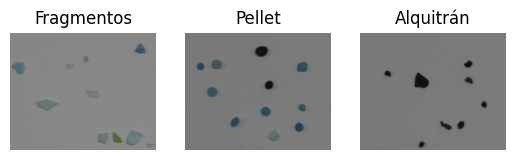

In [20]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

In [21]:
def getArea(contour):
    return cv2.contourArea(contour)
def getPerimeter(contour):
    return cv2.arcLength(contour, True)
def getCompactness(contour):
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    return (perimeter**2)/area

https://theailearner.com/tag/cv2-minarearect/

In [22]:
def area_bounding_box_ratio(contour):
    # Calcula el área del contorno
    area = cv2.contourArea(contour)

    # Calcula la caja delimitadora mínima ajustada al contorno
    rect = cv2.minAreaRect(contour)
    width, height = rect[1]
    box_area = width * height

    # Devuelve la relación entre el área del contorno y el área de la caja
    return area / box_area

def ratio_width_height_container(contour):
    # Calcula la caja delimitadora mínima ajustada al contorno
    container = cv2.minAreaRect(contour)
    width, height = container[1]
    
    # Devuelve la relación entre el ancho y el alto de la caja
    return width / height

def ratio_axis_fitted_ellipse(contour):
    # Calcula la elipse ajustada al contorno
    ellipse = cv2.fitEllipse(contour)
    axisA, axisB = ellipse[1]
    
    # Devuelve la relación entre los ejes A y B de la elipse
    return axisA / axisB

https://stackoverflow.com/questions/43517069/find-distance-from-contour-to-a-point-opencv-c

In [23]:
def distance_ratio(contour):

    # Comprobación: Si el contorno tiene menos de 5 puntos, no se puede calcular la relación.
    if contour.shape[0] < 5:
        return 0

    min_distance = 0
    max_distance = 0
    flag = 0

    # Ajusta una elipse al contorno
    elipse = cv2.fitEllipse(contour)
    cx, cy = elipse[0]  # Coordenadas del centro de la elipse

    for i in range(len(contour)):
        x = contour[i][0][0]
        y = contour[i][0][1]

        if flag == 0:
            # Inicializa los valores mínimos y máximos con la distancia al primer punto.
            min_distance = max_distance = math.sqrt(pow((x - cx), 2) + pow((y - cy), 2))
            flag = 1
        else:
            # Calcula la distancia al punto actual.
            distance = math.sqrt(pow((x - cx), 2) + pow((y - cy), 2))

            # Actualiza los valores mínimos y máximos si es necesario.
            if distance > max_distance:
                max_distance = distance
            elif distance < min_distance:
                min_distance = distance

    # Devuelve la relación entre la distancia máxima y la distancia mínima.
    return max_distance / min_distance



geometry_functions = [
                    getArea,
                    getPerimeter,
                    getCompactness,
                    area_bounding_box_ratio,
                    ratio_width_height_container,
                    ratio_axis_fitted_ellipse,
                    distance_ratio
                    ]

Esta función, a partir de un conjunto de contornos, irá recorriendo cada contorno y obteniendo un array para cada uno con el resultado de calcular las 7 características geométricas presentadas anteriormente. Una vez hecho, se calculará la media de cada característica mediante el resultado de todos los contornos.

La finalidad es, para cada imagen o cada tipo de material, obtener un vector de la media de las características obtenidas a partir de los conotrnos de la imagen

In [24]:
""" La función get_mean_data(contours) se utiliza 
para calcular el valor promedio de diversas características 
geométricas de los contornos proporcionados."""

def get_mean_data(contours):
    # Inicializa listas para almacenar los datos promedio, datos de material y datos de contorno.
    mean_data = []
    material_data = []
    contour_data = []
    
    # Itera a través de los contornos proporcionados.
    for contour in contours:
        # Itera a través de funciones definidas en geometry_functions.
        for function in geometry_functions:
            # Calcula datos específicos para el contorno utilizando la función actual.
            contour_data.append(function(contour=contour))
        
        # Agrega los datos del contorno a la lista de datos de material.
        material_data.append(contour_data)
        # Limpia la lista de datos de contorno para el siguiente contorno.
        contour_data = []

    sum = 0
    # Calcula la media de cada tipo de dato recorriendo las listas de datos de material.
    for i in range(len(material_data[0])):
        for j in range(len(material_data)):
            sum += material_data[j][i]
        mean_data.append(sum / len(material_data))
        sum = 0

    # Devuelve los datos promedio.
    return mean_data


In [25]:
def printOtsu(image, image_th):
    
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(image, cmap='gray') 
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(image_th, cmap='gray') 
    plt.title('OTSU invertida')

In [26]:
"""La función getExternalContours(img_th) se utiliza para encontrar los contornos de una imagen binarizada. """

def getExternalContours(img_th):
    
    contornos, hierarchy = cv2.findContours(img_th, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

    return contornos, hierarchy

A la hora de procesar imágenes de entrenamiento como imágenes completas, surgen contornos cuya área es 0 o cuya área es muy grande ya que detecta contornos erróneos. Para dar una mejor aproximación a este problema, se crea esta función que hará un filtrado de los contornos para quedarnos con los relevantes.

In [27]:
def filterContours(contours):
    # Inicializa una lista para almacenar los contornos filtrados.
    contours_filtered = []

    # Itera a través de los contornos proporcionados.
    for contorno in contours:
        # Calcula el área del contorno actual.
        area = cv2.contourArea(contorno)

        # Verifica si el área del contorno está dentro del rango deseado (entre 500 y 20000).
        if 500 < area < 20000:
            # Si cumple con el criterio, agrega el contorno a la lista de contornos filtrados.
            contours_filtered.append(contorno)

    # Devuelve la lista de contornos filtrados.
    return contours_filtered

Una vez tenemos el vector de características media de un tipo de material, podemos comparar los contornos obtenidos de la imagen completa de ese material con el vector. La estrategia empleada ha sido, por cada contorno, **comparar la cercanía del valor de cada característica de ese contorno con la media de la característica**, para determinar, según esa característica, una estimación de que material es. Esto resulta en un nuevo vector que representa la estimación de material según cada característica para cada contorno, y determinaremos el material según el material que más se repita en el vector obtenido anteriormente.



In [28]:
def microplasticClassifier(contours, mean_data):
    # Inicializa una lista para almacenar la frecuencia de elementos en cada categoría.
    frecuency_elements = [0, 0, 0]

    # Itera a través de los contornos proporcionados.
    for contour in contours:
        contour_info = []

        # Calcula datos específicos para el contorno actual utilizando funciones definidas en geometry_functions.
        for function in geometry_functions:
            contour_info.append(function(contour=contour))

        dif = 0
        flag = 0
        element_clasification = []

    # Itera a través de las características del contorno actual.
    for i in range(len(contour_info)):
        # Inicializa la variable "index" que almacenará la categoría más cercana.
        index = 0
        
        # Itera a través de las categorías promedio (mean_data).
        for j in range(len(mean_data)):
            # Calcula la diferencia absoluta entre la característica del contorno actual y la característica promedio de la categoría j.
            close_to = abs(mean_data[j][i] - contour_info[i])

            # Si es la primera comparación, establece "dif" como la diferencia y "index" como la categoría actual.
            if flag == 0:
                dif = close_to
                flag = 1
                index = j
            else:
                # Si se encuentra una diferencia más pequeña, actualiza "dif" y "index" con la nueva categoría.
                if close_to < dif:
                    dif = close_to
                    index = j

        # Agrega el índice de la categoría más cercana a la lista "element_clasification".
        element_clasification.append(index)

        # Restablece "dif" y "flag" para la próxima característica del contorno.
        dif = 0
        flag = 0


        # Determina la categoría más frecuente en la clasificación de elementos y la cuenta.
        frecuency_elements[max(set(element_clasification), key=element_clasification.count)] += 1
        element_clasification = []

    # Devuelve la frecuencia de elementos en cada categoría.
    return frecuency_elements


Esta función crea la matriz de confusión de la clasificación de un material a partir de la estimación de materiales, ya procesada, y el tipo de microplástico. Se ha obtenido para ello información del siguiente enlace: https://vitalflux.com/python-draw-confusion-matrix-matplotlib/

In [29]:
def get_confusion_matrix(values, microplastic_type):
    # Crea un diccionario para mapear tipos de microplásticos a valores proporcionados.
    microplastics = {"Fragmentos": values[0], "Pellets": values[1], "Alquitran": values[2]}

    # Inicializa una matriz de confusión 2x2 con ceros.
    confusion_matrix = [[0, 0], [0, 0]]

    for microplastic, value in microplastics.items():
        if microplastic == microplastic_type:
            confusion_matrix[0][0] = value
        else:
            confusion_matrix[0][1] += value

    # Crea una figura y ejes para mostrar la matriz de confusión.
    fig, ax = plt.subplots(figsize=(7.5, 7.5))

    # Dibuja la matriz de confusión como una imagen con colores y transparencia.
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)

    # Agrega los valores de la matriz en las celdas correspondientes.
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[0])):
            ax.text(x=j, y=i, s=confusion_matrix[i][j], va='center', ha='center', size='xx-large')

    # Configura etiquetas y título para la matriz de confusión.
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Matriz de confusión: ' + str(microplastic_type), fontsize=18)

    # Agrega un título general que muestra los valores de cada tipo de microplástico.
    plt.suptitle("Fragmentos: " + str(values[0]) + " | Pellets: " + str(values[1]) + " | Alquitran: " + str(values[2]))

    # Muestra la matriz de confusión.
    plt.show()

    
    # Inicializa una matriz de confusión 2x2 con ceros.
    confusion_matrix = [[0, 0], [0, 0]]

    for microplastic, value in microplastics.items():
        if microplastic == microplastic_type:
            confusion_matrix[0][0] = value
        else:
            confusion_matrix[0][1] += value

    # Crea una figura y ejes para mostrar la matriz de confusión.
    fig, ax = plt.subplots(figsize=(7.5, 7.5))

    # Dibuja la matriz de confusión como una imagen con colores y transparencia.
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)

    # Agrega los valores de la matriz en las celdas correspondientes.
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[0])):
            ax.text(x=j, y=i, s=confusion_matrix[i][j], va='center', ha='center', size='xx-large')

    # Configura etiquetas y título para la matriz de confusión.
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Matriz de confusión: ' + str(microplastic_type), fontsize=18)

    # Agrega un título general que muestra los valores de cada tipo de microplástico.
    plt.suptitle("Fragmentos: " + str(values[0]) + " | Pellets: " + str(values[1]) + " | Alquitran: " + str(values[2]))

    # Muestra la matriz de confusión.
    plt.show()



En esta celda a continuación, se cargará las imágenes de muestra para determinar, para cada imagen (o tipo de material), un vector con la media de las características extraídas para cada uno. En primer lugar, se emplea OTSU para tratar de determinar los contornos externos de las imágenes. A partir de aquí, se filtran los contornos obtenidos para despreciar aquellos contornos que no aportan información relevante y se mostrará como ejemplo de lo que vamos a tratar. Ya obtenidos los contornos, para cada grupo de contornos de cada material, se realiza un procesamiento del mismo para obtener un vector de longitud igual al número de características geométricas, donde aparecerá la media de cada característica según el tipo de material.

Una vez hemos obtenido estos vectores, se procesan las imágenes completas para obtener de la misma manera los contornos relevantes, y se llamará a la función microplasticClassifier() para determinar a que tipo de material corresponde cada contorno de la imagen y devolver un array con tres elementos, indicando el número de materiales de cada tipo encontrados. Ya por último, en base a estos resultados, se muestra la matriz de confusión.

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


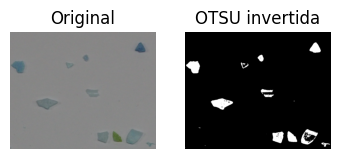

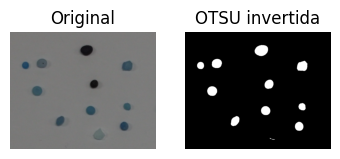

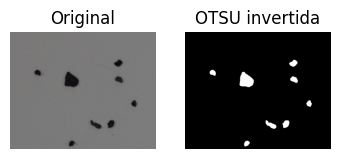

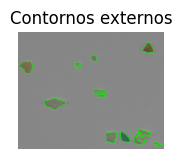

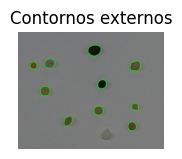

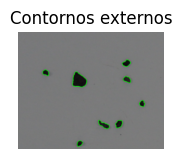

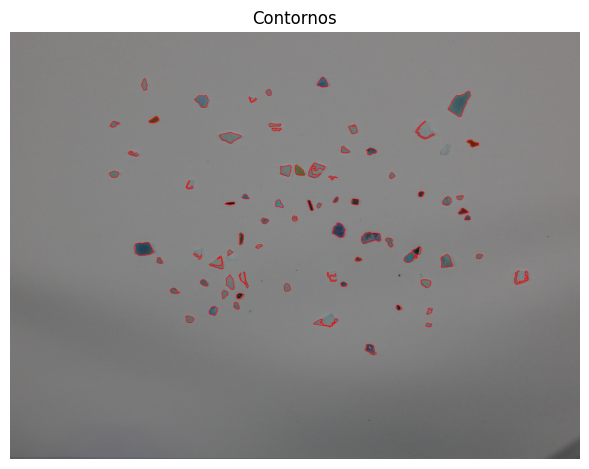

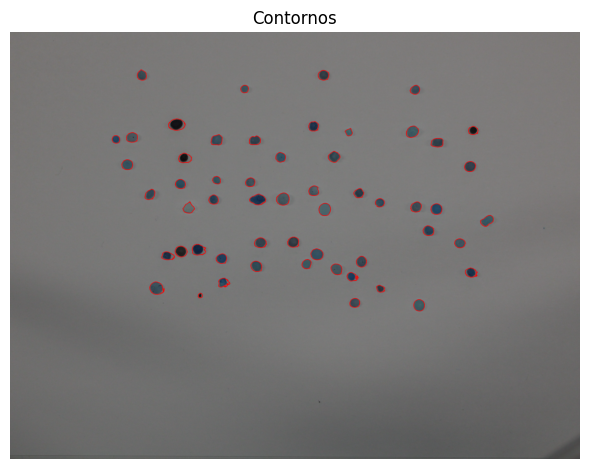

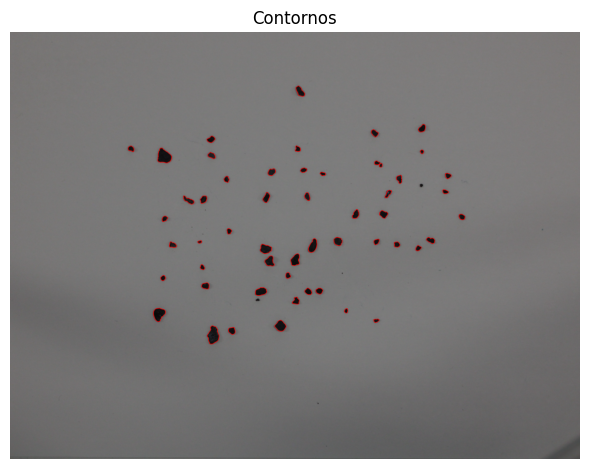

In [31]:
# Se cargan las imágenes FRA.png, PEL.png y TAR.png
imgF = cv2.imread('FRA.png')
imgP = cv2.imread('PEL.png')
imgT = cv2.imread('TAR.png')

# Se convierten las imágenes a escala de grises y se almacenan en nuevas variables
imgF_gris = cv2.cvtColor(imgF, cv2.COLOR_BGR2GRAY)
imgP_gris = cv2.cvtColor(imgP, cv2.COLOR_BGR2GRAY)
imgT_gris = cv2.cvtColor(imgT, cv2.COLOR_BGR2GRAY)

# Se aplica el método de Otsu para obtener una imagen umbralizada en escalade grises para encontrar
retF, img_thF = cv2.threshold(imgF_gris, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
retP, img_thP = cv2.threshold(imgP_gris, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
retT, img_thT = cv2.threshold(imgT_gris, 0, 255, cv2.THRESH_BINARY_INV   + cv2.THRESH_OTSU)

# Se almacenan las imágenes originales, en escala de grises y binarizadas en listas
images = [imgF, imgP, imgT]
images_gris = [imgF_gris, imgP_gris, imgT_gris]
images_th = [img_thF, img_thP, img_thT]

# Se realiza un bucle para imprimir las imágenes originales junto con las binarizadas
for i in range(0, 3):
    printOtsu(images[i], images_th[i])

# Se obtienen los contornos de las imágenes binarizadas
contornosF, hierarchyF = getExternalContours(img_thF)
contornosP, hierarchyP = getExternalContours(img_thP)
contornosT, hierarchyT = getExternalContours(img_thT)

# Se convierten las imágenes originales a formato RGB
imgF_rgb = cv2.cvtColor(imgF, cv2.COLOR_BGR2RGB)
imgP_rgb = cv2.cvtColor(imgP, cv2.COLOR_BGR2RGB)
imgT_rgb = cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB)

# Se filtran los contornos despreciables
contornosF = filterContours(contornosF)
contornosP = filterContours(contornosP)
contornosT = filterContours(contornosT)

# Se almacenan los contornos y las imágenes RGB en listas
contornos = [contornosF, contornosP, contornosT]
images_rgb = [imgF_rgb, imgP_rgb, imgT_rgb]

# Se dibujan los contornos en las imágenes RGB
for i in range(0, 3):
    cv2.drawContours(images_rgb[i], contornos[i], -1, (0, 255, 0), 3)

# Se muestran las imágenes con los contornos dibujados
for i in range(0, 3):
    plt.figure()
    plt.subplot(131)
    plt.axis("off")
    plt.imshow(images_rgb[i])
    plt.title('Contornos externos')

# Se calcula el vector de la media de cada característica por tipo de material
mean_data = []
for contours in contornos:
    mean_data.append(get_mean_data(contours))

# Se cargan las imágenes completas para su análisis
imgF_completa = cv2.imread('fragment-03-olympus-10-01-2020.JPG')
imgP_completa = cv2.imread('pellet-03-olympus-10-01-2020.JPG')
imgT_completa = cv2.imread('tar-03-olympus-10-01-2020.JPG')

# Se convierten las imágenes completas a escala de grises para simplificar el proceso y mejorar la efectividad y detección de objetos
imgF_gris_completa = cv2.cvtColor(imgF_completa, cv2.COLOR_BGR2GRAY)
imgP_gris_completa = cv2.cvtColor(imgP_completa, cv2.COLOR_BGR2GRAY)
imgT_gris_completa = cv2.cvtColor(imgT_completa, cv2.COLOR_BGR2GRAY)

# Se aplica el método de Otsu a las imágenes completas https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
retF_completa, img_thF_completa = cv2.threshold(imgF_gris_completa, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
retP_completa, img_thP_completa = cv2.threshold(imgP_gris_completa, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
retT_completa, img_thT_completa = cv2.threshold(imgT_gris_completa, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Se obtienen los contornos de las imágenes completas
contornosF_completa, hierarchyF_completa = getExternalContours(img_thF_completa)
contornosP_completa, hierarchyP_completa = getExternalContours(img_thP_completa)
contornosT_completa, hierarchyT_completa = getExternalContours(img_thT_completa)

# Se convierten las imágenes completas a formato RGB
imgF_rgb_completa = cv2.cvtColor(imgF_completa, cv2.COLOR_BGR2RGB)
imgP_rgb_completa = cv2.cvtColor(imgP_completa, cv2.COLOR_BGR2RGB)
imgT_rgb_completa = cv2.cvtColor(imgT_completa, cv2.COLOR_BGR2RGB)

# Se filtran los contornos despreciables en las imágenes completas
contornosF_completa = filterContours(contornosF_completa)
contornosP_completa = filterContours(contornosP_completa)
contornosT_completa = filterContours(contornosT_completa)

# Se dibujan los contornos en las imágenes completas
imgF_completa_contornos = cv2.drawContours(imgF_completa, contornosF_completa, -1, (255, 0, 0), 3)
imgP_completa_contornos = cv2.drawContours(imgP_completa, contornosP_completa, -1, (255, 0, 0), 3)
imgT_completa_contornos = cv2.drawContours(imgT_completa, contornosT_completa, -1, (255, 0, 0), 3)


images_contornos = [imgF_completa_contornos, imgP_completa_contornos, imgT_completa_contornos]

# Se muestran las imágenes completas con los contornos dibujados
for i in range(0, 3):
    plt.figure(figsize=(25, 25))
    plt.subplot(131)
    plt.axis("off")
    plt.imshow(images_contornos[i])
    plt.title('Contornos')

